In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

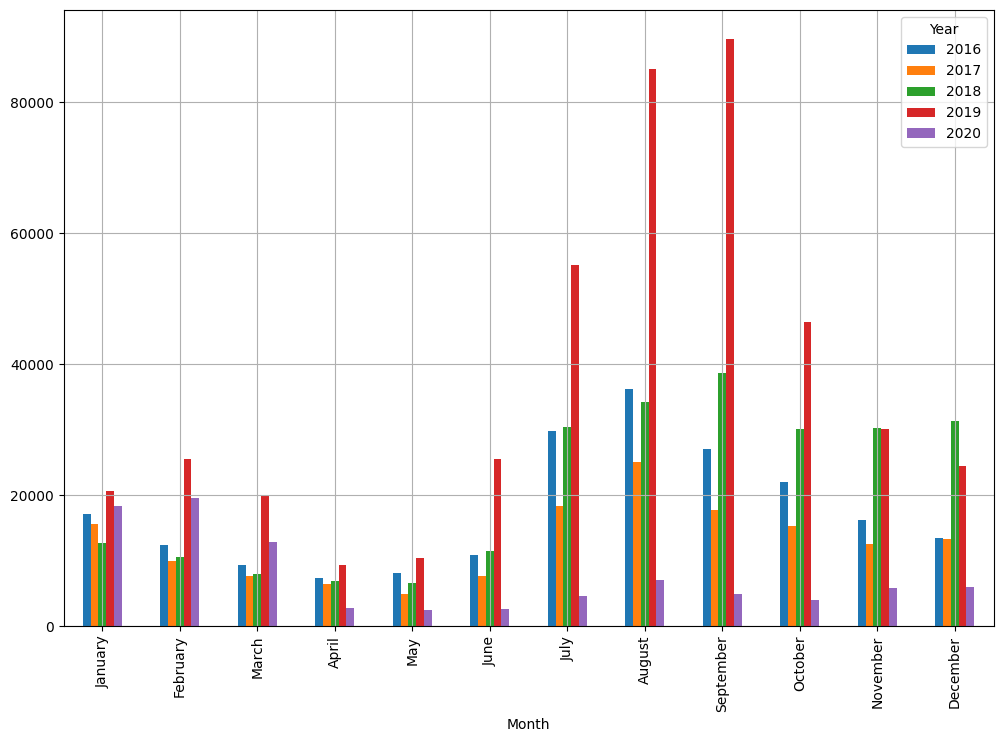

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='bar')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h1>Insights 1-5</h1>

<i>"Dengue cases peaked in July, August, and September 2016, likely due to monsoon-related environmental conditions."<i>

<i>"In both 2016 and 2017, dengue cases significantly increased during the months of July, August, and September, indicating a consistent seasonal pattern likely driven by monsoon-related environmental conditions."</i>

<i>"In 2018, there is a rapid increase of dengue cases, this is the second highest dengue cases in 2016-2020 dengue cases<i>

<i>"In 2019, there is the highest dengue cases in the graph and the dengue cases peaked in July to October 2019<i>

<i>In 2020, the lowest record of dengue cases and the dengue cases are also decreased in April to December 2020 <i>

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

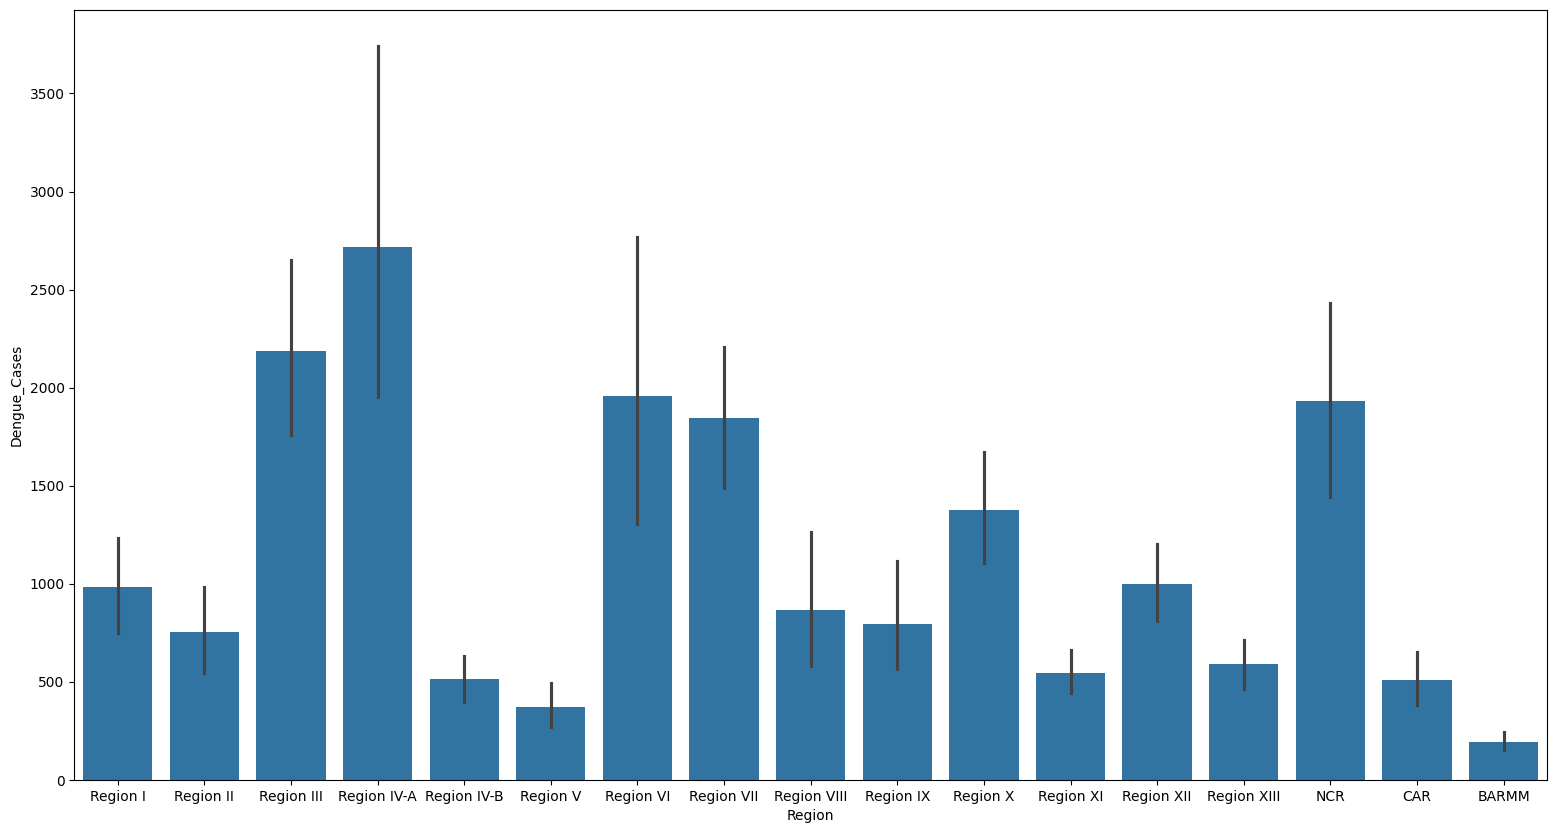

In [9]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h1>The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region</h1>

<h1> Dengue Deaths Rate per each Region </h1>

In [11]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [12]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [16]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

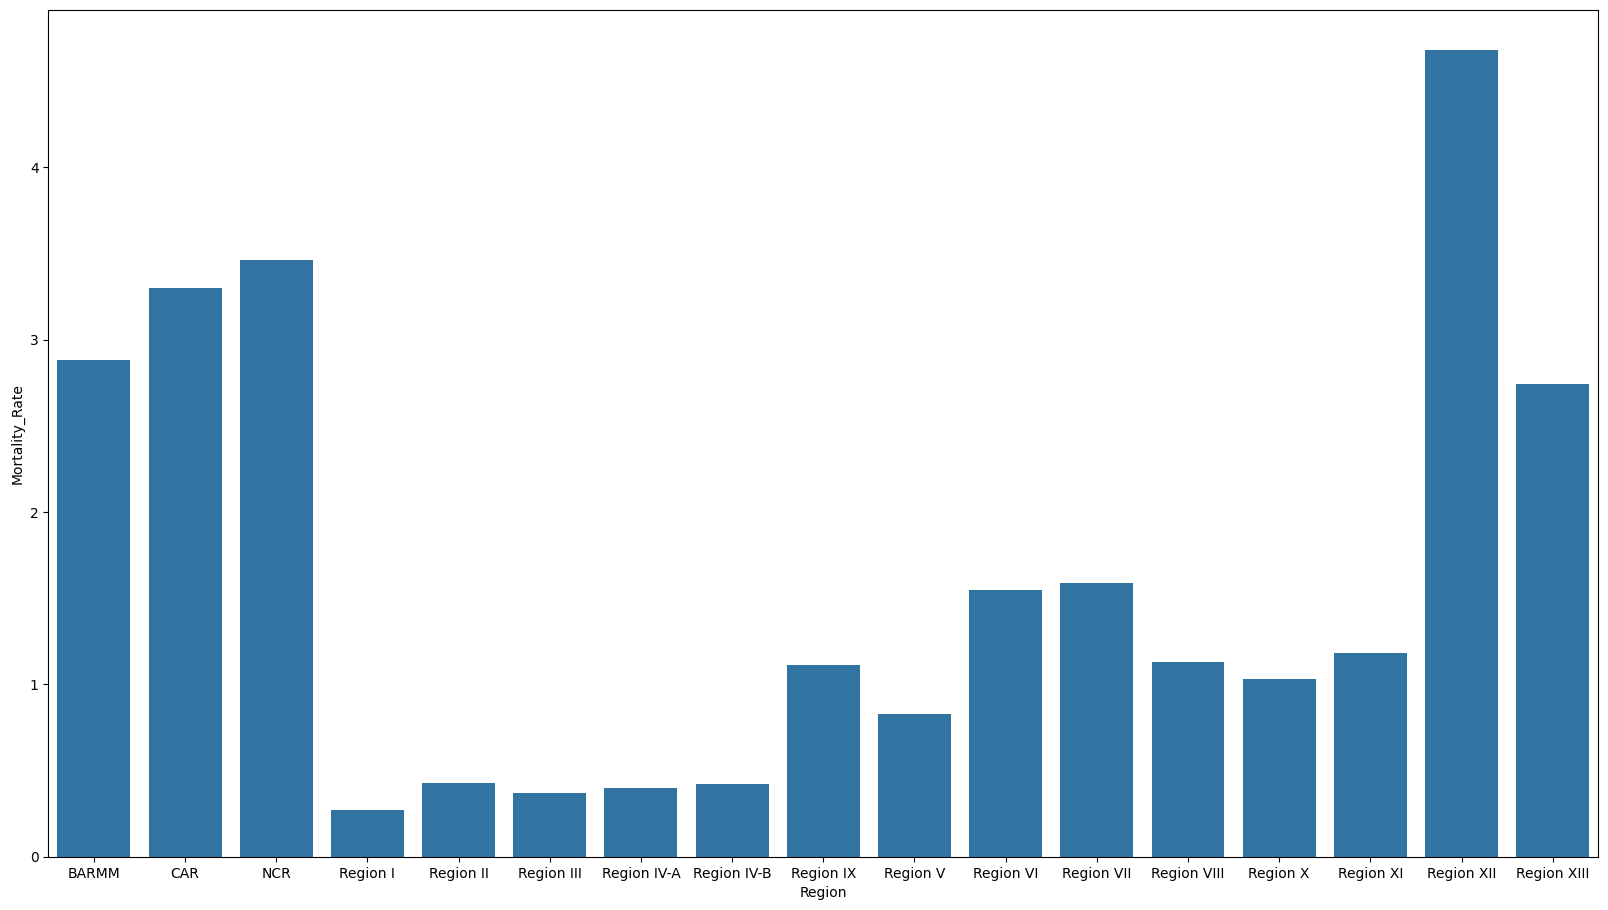

In [17]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

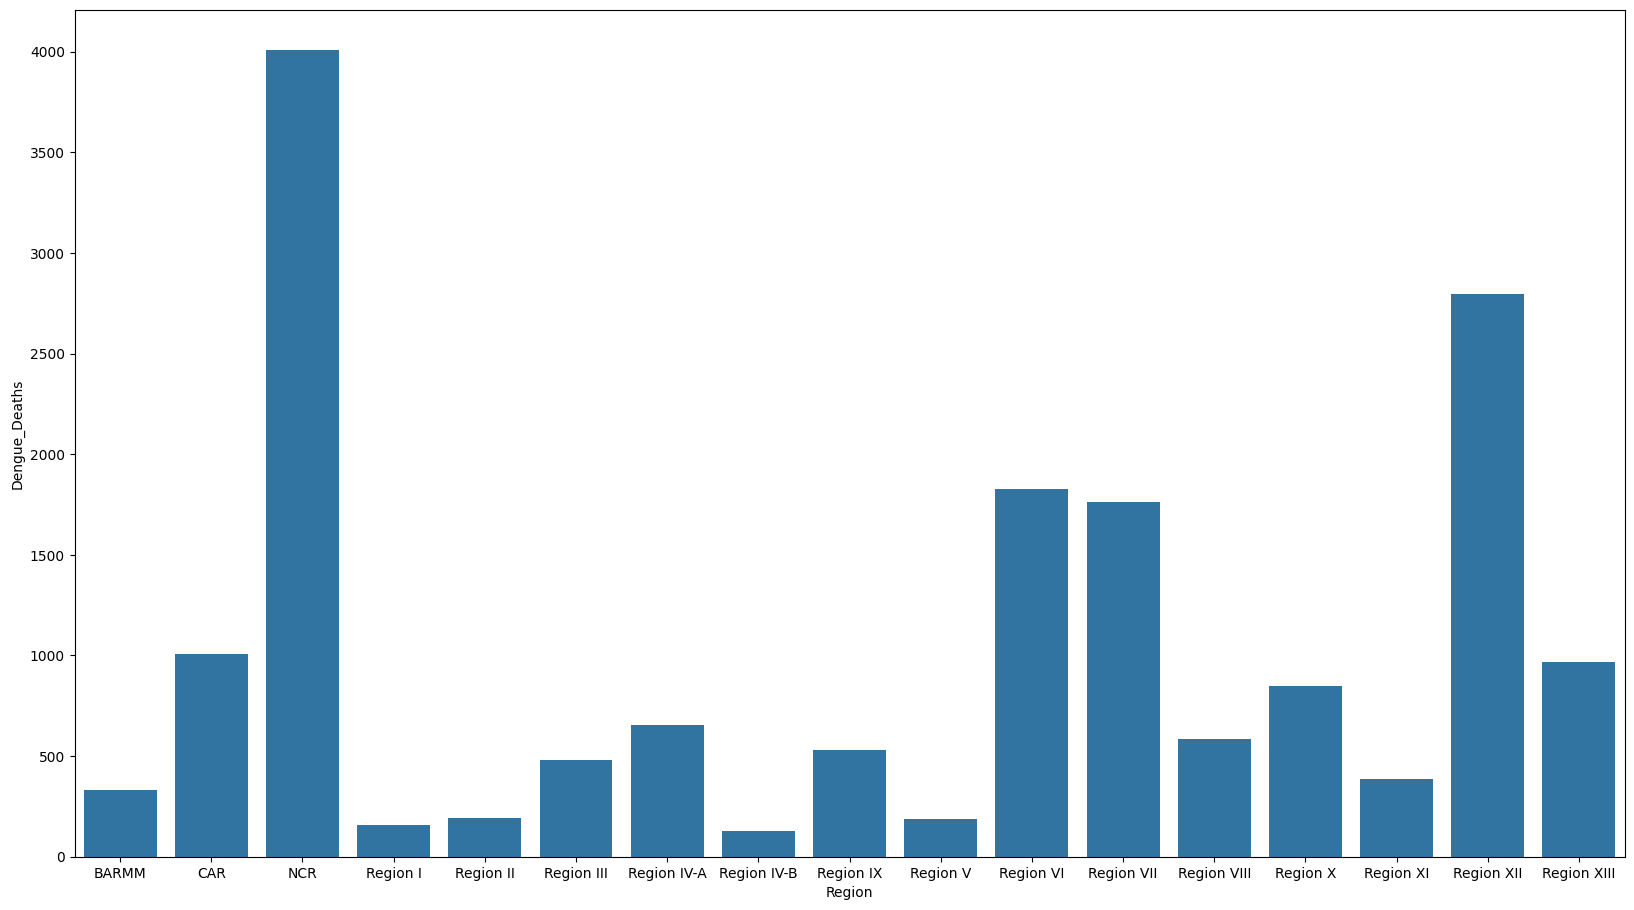

In [15]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Dengue_Deaths")
plt.gcf().set_size_inches(20,11)
plt.show()

<h1>Insights 6-10</h1>

<i>Region XII Has the highest dengue mortality rate but only the second highest number of dengue deaths and the Dengue Cases this region is low of dengue cases</i>

<i>In the NCR has the highest number of dengue deaths but only the second highest mortality rate</i>

<i>In Region 4A has the highest number of dengue cases, meaning many people are infected. However, its dengue deaths and mortality rate are low, meaning fewer people die from the disease compared to other regions.</i>

<i>The lowest rate of Dengue Deaths is Region IV-B but not the lowest number of dengue cases or mortality rate. The situation in Region IV-B is good, the region is doing well in reducing dengue deaths,even though dengue prevention efforts can still be strengthened to lower the number of cases.</i>

<i>Regions VI and VII have a balanced number of dengue cases, but Region VII has the higher mortality rate. Region VI’s mortality rate is not far behind. However, Region VI has the highest number of dengue deaths because it has slightly more dengue cases compared to Region VII. Overall, the dengue situation in both regions appears to be quite balanced in terms of cases, deaths, and mortality rates.<i>